In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%run Accuracy_Module.py
%run DataLoading.py
%run load_and_organize_dataset.py
%run training_module.py

In [3]:
train_loader, val_loader, test_loader = load_dataset(32)

['44', '61', '9', '63', '7', '43', '14', '32', '25', '46', '74', '90', '94', '68', '57', '33', '37', '88', '16', '77', '17', '66', '23', '36', '11', '2', '45', '20', '12', '13', '22', '19', '30', '26', '38', '18', '58', '79', '6', '71', '54', '52', '27', '60', '56', '48', '64', '1', '29', '83', '4', '84', '5', '81', '55', '50', '78', '49', '35', '75', '80', '65', '70', '41', '51', '47', '10', '82', '28', '40', '91', '62', '67', '39', '76', '53', '8', '24', '59', '87', '95', '72', '73', '15', '85', '89', '31', '86', '92', '34', '93', '3', '69', '42', '21']
['44', '61', '9', '63', '7', '43', '14', '32', '25', '46', '74', '90', '94', '68', '57', '33', '37', '88', '16', '77', '17', '66', '23', '36', '11', '2', '45', '20', '12', '13', '22', '19', '30', '26', '38', '18', '58', '79', '6', '71', '54', '52', '27', '60', '56', '48', '64', '1', '29', '83', '4', '84', '5', '81', '55', '50', '78', '49', '35', '75', '80', '65', '70', '41', '51', '47', '10', '82', '28', '40', '91', '62', '67', '39', 

In [ ]:
class alexnet_classifier(nn.Module):
    def __init__(self, num_classes):
        super(alexnet_classifier, self).__init__()
        self.name = "alexnet_classifier"
        self.fc1 = nn.Linear(9216, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 1000)
        self.fc4 = nn.Linear(1000, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = x.cuda()
        x = alexnet(torch.autograd.Variable(x))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)        
        x = self.softmax(x)

        ranges = torch.tensor(np.arange(1,96)).float()
        ranges = torch.tensor(np.tile(ranges,(x.shape[0],1)), requires_grad=True).cuda()
        
        ranges = torch.autograd.Variable(ranges, requires_grad=True)
        x = x * ranges
        
        x = x.sum(dim=1)

        return x

In [10]:
alexnet = models.alexnet(pretrained=False)
alexnet = nn.Sequential(alexnet.features, alexnet.avgpool)
alexnet.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): AdaptiveAvgPool2d(output_size=(6, 6))
)

In [16]:
alex_class = alexnet_classifier(95)
alex_class.cuda()

alexnet_classifier(
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=95, bias=True)
  (softmax): Softmax()
)

0
50
100
150
200
250
300
350
400
450
500
Epoch: 1, Training Loss: 3.074, Training R^2: 0.043, Validation R^2: 0.053
550
600
650
700
750
800
850
900
950
1000
1050
Epoch: 2, Training Loss: 30.612, Training R^2: 0.082, Validation R^2: 0.097
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
Epoch: 3, Training Loss: 3.427, Training R^2: 0.151, Validation R^2: 0.170
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
Epoch: 4, Training Loss: 8.327, Training R^2: 0.242, Validation R^2: 0.261
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
Epoch: 5, Training Loss: 9.890, Training R^2: 0.340, Validation R^2: 0.345
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
Epoch: 6, Training Loss: 3.390, Training R^2: 0.392, Validation R^2: 0.402
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
Epoch: 7, Training Loss: 2.505, Training R^2: 0.410, Validation R^2: 0.415
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
Epoch: 8, Training Loss: 13.690, Training R^2: 0.423, Validation R^2: 0.

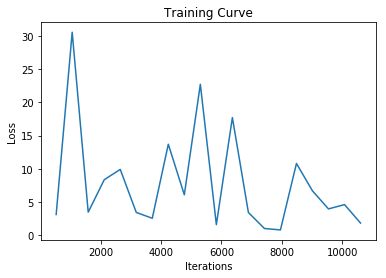

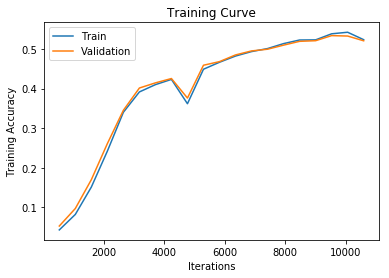

Final Training R^2: 0.5236029624938965
Final Validation R^2: 0.5207746028900146
Finished Training
Total time elapsed: 2097.99 seconds


In [17]:
train_net(alex_class, batch_size=32, learning_rate=1e-5, num_epochs=20)